In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from scipy import stats
import os
import numpy as np
import glob

In [2]:
path = './'

In [3]:
AllData = pd.read_csv(path + 'AllLight_AllMoths.csv')
AllData.head()

,Unnamed: 0,Unnamed: 0.1,DiscoveryTime,In_Frame,Out_Frame,Proboscis,name,trialNum
0,0,0,NaN,26059,27412,NaN,L0.1_c-3_m12,0
1,1,1,NaN,27622,28036,NaN,L0.1_c-3_m12,1
2,2,2,NaN,29811,30085,NaN,L0.1_c-3_m12,2
3,3,3,282.0,45940,52780,46222.0,L0.1_c-3_m20,0
4,4,4,283.0,55058,60805,55341.0,L0.1_c-3_m20,1


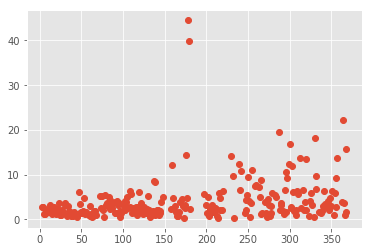

In [4]:
plt.plot(AllData.DiscoveryTime/100, 'o')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


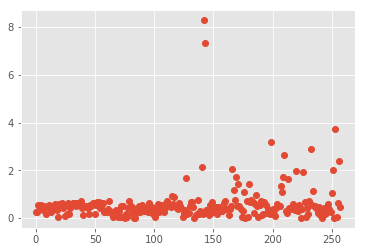

In [5]:
AllData_notnull = AllData[AllData.DiscoveryTime.notnull()].copy()
z = np.abs(stats.zscore(AllData_notnull.DiscoveryTime.values))
outlier_ID = z > 5
plt.plot(z, 'o') 

AllData_notnull.loc[:,'zscore'] = pd.Series(data = z, index = AllData_notnull.index)
AllData_notnull.loc[:,'outlier_ID'] = pd.Series(data = outlier_ID, index = AllData_notnull.index)

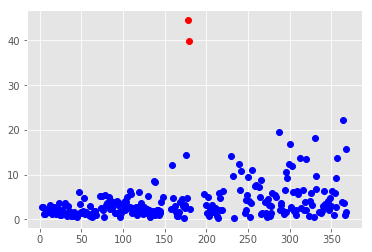

In [11]:
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == True]/100, 'o', color = 'red')
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == False]/100, 'o', color = 'blue')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


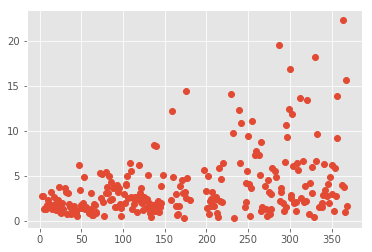

In [28]:
notoutliers = AllData_notnull[AllData_notnull.outlier_ID == False]
notoutliers['DiscoveryTime'] = notoutliers.DiscoveryTime.div(100, axis = 'index')
plt.plot(notoutliers['DiscoveryTime'], 'o')

Text(0.5,0,'Occurance')

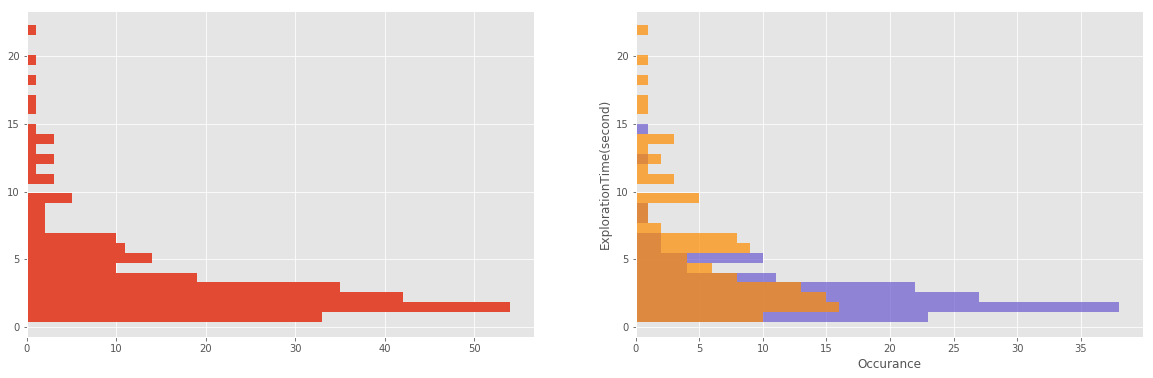

In [52]:
hist, bins = np.histogram(notoutliers.DiscoveryTime.values, bins = 30)

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[0].hist(notoutliers.DiscoveryTime.values, bins, histtype = 'bar', orientation='horizontal')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange')
ax[1].set_ylabel('ExplorationTime(second)')
ax[1].set_xlabel('Occurance')

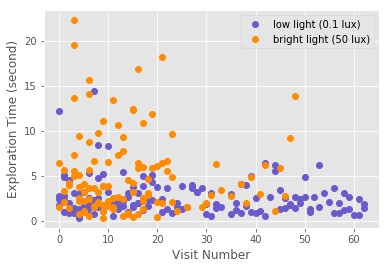

In [47]:
plt.plot(notoutliers[notoutliers.name.str.contains('L0.1')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L0.1')].DiscoveryTime,
         'o', color = 'slateblue', label = 'low light (0.1 lux)')
plt.plot(notoutliers[notoutliers.name.str.contains('L50')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L50')].DiscoveryTime, 
         'o', color = 'darkorange', label = 'bright light (50 lux)')
plt.ylabel('Exploration Time (second)')
plt.xlabel('Visit Number')
plt.legend()

# add exponential curves - color: L50 - chocolate or saddle brown, L0.1 - darkslateblue, or blue violet

In [79]:
# BinnedDataSet
# binsize = 10
# new_column = binLabel 

notoutliers['binLabel'] = ['0-9' if value <= 9 
                           else ('10-19' if (value > 9) & (value <= 19) else '20andAbove') 
                           for value in notoutliers['trialNum']]

notoutliers['lightLevel'] = ['low' if 'L0.1' in value 
                           else 'high' for value in notoutliers['name']]

notoutliers.head()

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,Unnamed: 0.1,DiscoveryTime,In_Frame,Out_Frame,Proboscis,name,trialNum,zscore,outlier_ID,binLabel,lightLevel
3,3,3,2.82,45940,52780,46222.0,L0.1_c-3_m20,0,0.243607,False,0-9,low
4,4,4,2.83,55058,60805,55341.0,L0.1_c-3_m20,1,0.241560,False,0-9,low
5,5,5,1.32,67612,69165,67744.0,L0.1_c-3_m20,2,0.550704,False,0-9,low
6,6,6,1.45,72461,74177,72606.0,L0.1_c-3_m20,3,0.524089,False,0-9,low
7,7,7,1.31,77368,78421,77499.0,L0.1_c-3_m20,4,0.552752,False,0-9,low


In [80]:
notoutliers.binLabel.unique()

array(['0-9', '10-19', '20andAbove'], dtype=object)

Text(0.5,0,'Probability')

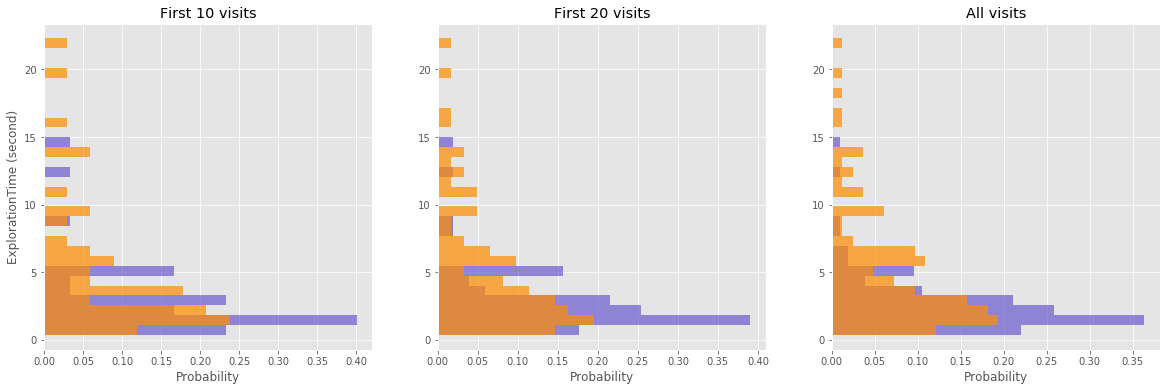

In [117]:
fig, ax = plt.subplots(1,3, figsize = (20,6))
ax = ax.ravel()

hist_10_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel == '0-9')].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_10_Highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel == '0-9')].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[0].set_title('First 10 visits')

hist_20_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_20_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[1].set_title('First 20 visits')


hist_all_lowlight,_, _ = ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_all_highlight, _, _ =ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[2].set_title('All visits')

ax[0].set_ylabel('ExplorationTime (second)')
ax[0].set_xlabel('Probability')
ax[1].set_xlabel('Probability')
ax[2].set_xlabel('Probability')

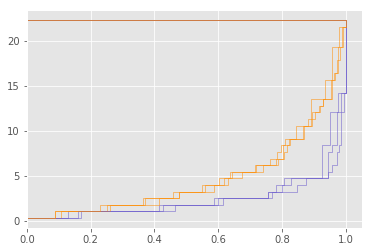

In [99]:
hist_20_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_20_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')


hist_10_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel == '0-9')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_10_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel == '0-9')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

hist_all_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_all_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

In [106]:
def KL(P,Q, epsilon):
# """ Epsilon is used here to avoid conditional code for
# checking that neither P nor Q is equal to 0. """
#      epsilon = 1e-20
     # You may want to instead make copies to avoid changing the np arrays.
     P = P+epsilon
     Q = Q+epsilon
     divergence = np.sum(P*np.log(P/Q))
     return divergence

In [100]:
KL(hist_20_lowlight, hist_20_highlight, 1e-30)

3.6281681325250204

In [101]:
KL(hist_10_lowlight, hist_10_highlight, 1e-30)

3.3804771499547837

In [102]:
KL(hist_all_lowlight, hist_all_highlight, 1e-30)

3.9978880462924358

In [103]:
stats.ks_2samp(hist_20_highlight,hist_20_lowlight)

Ks_2sampResult(statistic=0.39999999999999997, pvalue=0.011313647722167215)

In [104]:
stats.ks_2samp(hist_10_highlight,hist_10_lowlight)

Ks_2sampResult(statistic=0.39999999999999997, pvalue=0.011313647722167215)

In [105]:
stats.ks_2samp(hist_all_highlight,hist_all_lowlight)

Ks_2sampResult(statistic=0.5, pvalue=0.000615779027922126)

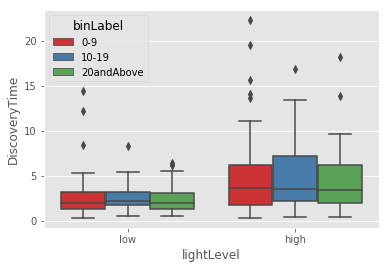

In [82]:
import seaborn as sns
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="lightLevel", y="DiscoveryTime", hue="binLabel", data=notoutliers, palette="Set1")
# sns.plt.show()

In [113]:
notoutliers.to_csv(path + 'notoutliers.csv')